### prepare modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import QUANTAXIS as QA
import talib as ta
import datetime, time
# import pandas_datareader.data as web

from utils import get_data, get_code_list_by_sector
from utils import select_code, position_side
from utils import single_pair_trading

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

### prepare data

In [3]:
code_list_by_sector = pd.read_excel('data/etf_pair_code.xlsx', dtype={'symbol':str})
sector_list = code_list_by_sector.sector.unique().tolist()
region_list = code_list_by_sector.region.unique().tolist()

us_data = get_data('data/us_data.csv')
hk_data = get_data('data/hk_data.csv')

In [5]:
hk_data.head()

,,high,low,open,close,volume,Adj Close
date,code,,,,,,
2015-06-29,3396.hk,43.549999,42.849998,43.150002,42.950001,62651090.0,41.258984
2015-06-30,3396.hk,43.450001,43.000000,43.000000,43.349998,8230600.0,41.643234
2015-07-02,3396.hk,43.950001,42.950001,43.349998,43.849998,7664889.0,42.123547
2015-07-03,3396.hk,43.900002,42.950001,43.849998,43.000000,5044400.0,41.307014
2015-07-06,3396.hk,43.500000,40.900002,43.049999,42.549999,29058194.0,40.874729


1. 遍历得到ratio的图，还包括ratio的上下轨，rsi等等
2. 这个还是写到表里面去吧，免得麻烦
3. 但也不行，因为这个是板块的
4. 总之先把单个的先做了

In [14]:
hk_data.index.get_level_values(1).unique().tolist()

['3396.hk',
 '3969.hk',
 '0968.hk',
 '1347.hk',
 '6088.hk',
 '6869.hk',
 '1357.hk',
 '1089.hk',
 '0327.hk',
 '1980.hk',
 '0877.hk',
 '0434.hk',
 '0799.hk',
 '1337.hk']

In [4]:
result = single_pair_trading(hk_data, '3396.hk', '3969.hk')

In [5]:
result['long_return']

-0.0006266263037303483

In [6]:
result['long_short_return']

-0.0008917708617966346

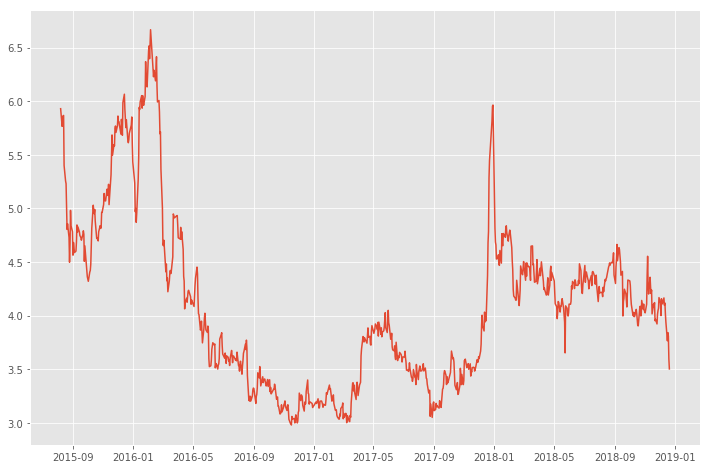

In [7]:
plt.plot(result['ratio'].index, result['ratio'].values);

1. 先选定sector
2. 再取出sector里的code
3. 

In [8]:
hk_data_code_list = hk_data.index.get_level_values(1).unique().tolist()

In [17]:
df_ratio = pd.DataFrame()
lens = len(hk_data_code_list)
for i in range(lens):
    for j in range(i+1, lens):
        code1 = hk_data_code_list[i]
        code2 = hk_data_code_list[j]
        temp_result = single_pair_trading(hk_data, code1, code2)
        temp_result['ratio'].name = "%s-%s" % (code1,code2)
        df_ratio = pd.concat([df_ratio, temp_result['ratio']], axis=1)

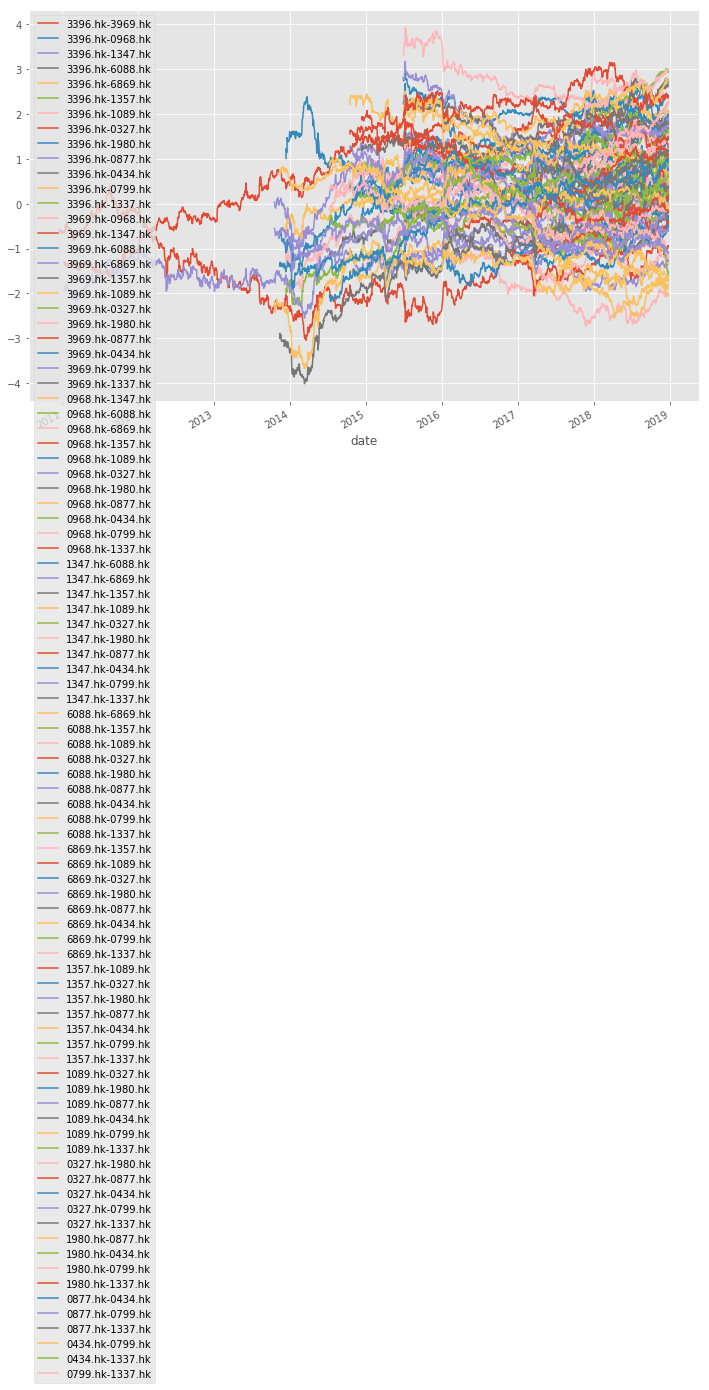

In [18]:
df_ratio.applymap(lambda x: np.log(x)).plot();

In [16]:
temp_result['ratio'].name

'Adj Close'

In [23]:
df_ratio.head()

,3396.hk-3969.hk,3396.hk-0968.hk,3396.hk-1347.hk,3396.hk-6088.hk,3396.hk-6869.hk,3396.hk-1357.hk,3396.hk-1089.hk,3396.hk-0327.hk,3396.hk-1980.hk,3396.hk-0877.hk,...,1980.hk-0877.hk,1980.hk-0434.hk,1980.hk-0799.hk,1980.hk-1337.hk,0877.hk-0434.hk,0877.hk-0799.hk,0877.hk-1337.hk,0434.hk-0799.hk,0434.hk-1337.hk,0799.hk-1337.hk
date,,,,,,,,,,,,,,,,,,,,,
2010-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
lens

14

In [22]:
lens * (lens+1) / 2 - 14

91.0